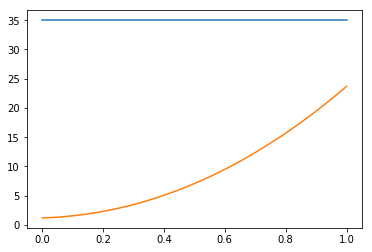

In [7]:
import matplotlib.pyplot as plt
import numpy as np
with open("../controllers/my_controller_python/args.txt",'r') as args:
    param_dic = eval(args.read())
    a = param_dic["jump_a"]
    b = param_dic["jump_b"]
    c = param_dic["jump_c"]
    d = param_dic["jump_d"]
t = np.linspace(0,1,100)
y_constant = 35*np.ones_like(t)
y_poly = (a * t + b * t ** 2 + c * t ** 3 +d)
plt.plot(t,y_constant)
plt.plot(t,y_poly)
plt.show()

In [1]:
# create client instance
from advisor_client.client import *
client = AdvisorClient()

In [15]:
# get study
study_name = "optimal_jump1"
study = client.get_study_by_name(study_name)
print(study)

Id: 1, name: optimal_jump1, study_configuration: {"randomInitTrials": 5, "params": [{"parameterName": "jump_a", "type": "DOUBLE", "maxValue": 20.0, "minValue": 1.0}, {"parameterName": "jump_b", "type": "DOUBLE", "maxValue": 20.0, "minValue": 1.0}, {"parameterName": "jump_c", "type": "DOUBLE", "maxValue": 20.0, "minValue": 1.0}, {"parameterName": "jump_d", "type": "DOUBLE", "maxValue": 20.0, "minValue": 1.0}, {"parameterName": "opt_vel", "type": "DOUBLE", "maxValue": 5.0, "minValue": 3.0}], "goal": "MINIMIZE"}, algorithm: BayesianOptimization


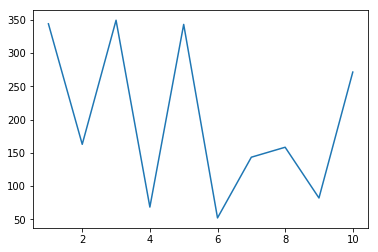

best trial: Id: 6, study_name: optimal_jump1, name: BayesianOptimizationTrial, parameter_values: {"opt_vel": 4.206803486518096, "jump_d": 3.888155513920391, "jump_c": 19.566897764462425, "jump_b": 19.817252505043353, "jump_a": 3.2600598870874267}, objective_value: 52.2372808372


In [16]:
# plot training curve
train_curve = []
if client.is_study_done(study_name):
    trials = client.list_trials(study_name)
    for trial in trials:
        trial_metrics = client.list_trial_metrics(study_name,trial.id)
        for metrics in trial_metrics:
            train_curve.append(metrics.objective_value)
plt.plot(range(1,len(train_curve)+1),train_curve)
plt.show()
best_trial = client.get_best_trial(study_name)
print("best trial: {}".format(best_trial))